In [4]:
import pandas as pd
df = pd.read_csv('/Users/thutranghoa/Code/Data_analysis/Data/gold_price_data.csv')
df.head(10)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099
5,1/9/2008,1409.130005,86.550003,75.250000,15.520000,1.466405
6,1/10/2008,1420.329956,88.250000,74.019997,16.061001,1.480100
7,1/11/2008,1401.020020,88.580002,73.089996,16.077000,1.479006
8,1/14/2008,1416.250000,89.540001,74.250000,16.280001,1.486900
9,1/15/2008,1380.949951,87.989998,72.779999,15.834000,1.480210


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


<Axes: >

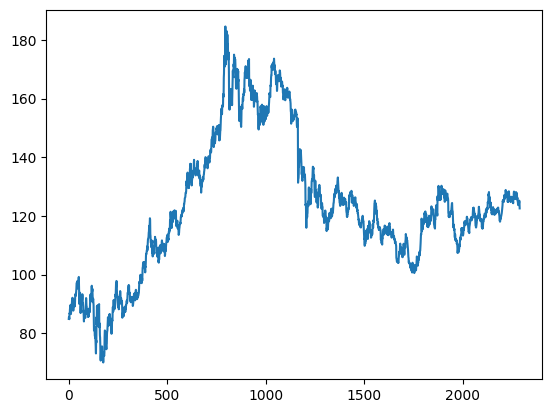

In [6]:
df['GLD'].plot()


In [7]:
X = df.drop(['Date', 'GLD'], axis= 1)
Y = df['GLD']

In [8]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=44)

In [10]:
'1 - Linear Regressor'

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

LR = LinearRegression()
LR.fit(X_train, y_train)
predictions_LR = LR.predict(X_test)

print ('MSE of LinearRegression= ', mean_squared_error(y_test, predictions_LR))
print ('R2_score of Linear Regression= ', r2_score(y_test, predictions_LR))

MSE of LinearRegression=  60.085117843236624
R2_score of Linear Regression=  0.8914634840439626


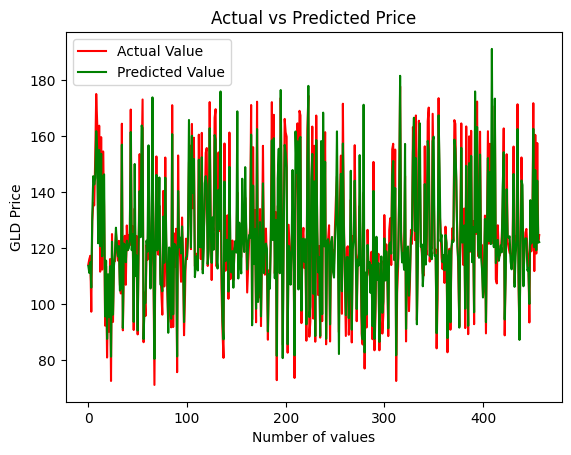

In [12]:
import matplotlib.pyplot as plt 

y_test = list(y_test)

plt.plot(y_test, color='red', label = 'Actual Value')
plt.plot(predictions_LR, color='green', label='Predicted Value')
plt.title('Actual vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [14]:
'2 - SVM'
from sklearn.svm import SVR 


svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)
predictions_svr = svr.predict(X_test)

print ('MSE of SVM= ', mean_squared_error(y_test, predictions_svr))
print ('R2_score of SVM= ', r2_score(y_test, predictions_svr))



MSE of SVM=  491.1864116160978
R2_score of SVM=  0.11273101035017286


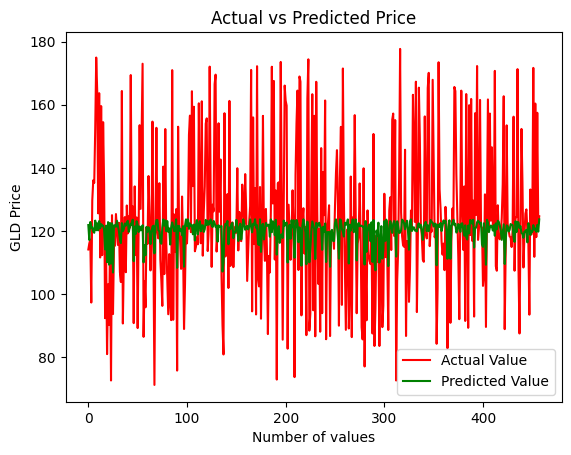

In [15]:
plt.plot(y_test, color='red', label = 'Actual Value')
plt.plot(predictions_svr, color='green', label='Predicted Value')
plt.title('Actual vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

MSE of DT=  10.47317237876113
R2_score DecisionTree =  0.9810814777136084


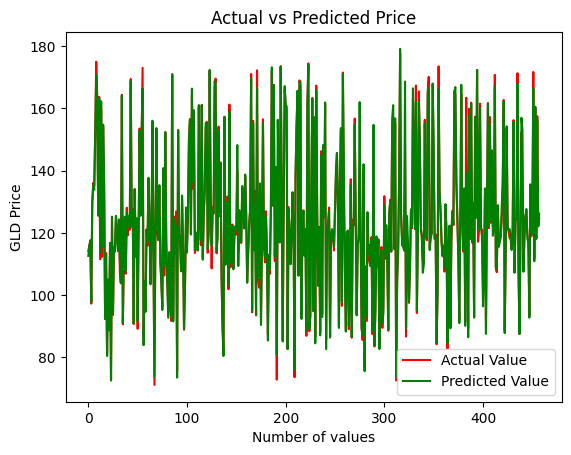

In [19]:
'3 - Decision Tree'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error , r2_score

regr = DecisionTreeRegressor()

regr.fit(X_train, y_train)

pred_DT = regr.predict(X_test)

print ('MSE of DT= ', mean_squared_error(y_test, pred_DT))
print ('R2_score DecisionTree = ', r2_score(y_test, pred_DT))

plt.plot(y_test, color='red', label = 'Actual Value')
plt.plot(pred_DT, color='green', label='Predicted Value')
plt.title('Actual vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

MSE of DT=  60.08511784323661
R2_score DecisionTree =  0.8914634840439626


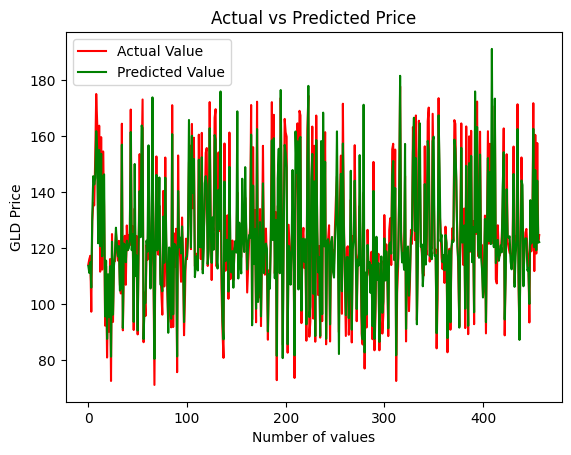

In [29]:
'4 - Gauss'
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.gaussian_process.kernels import RBF
import numpy as np

kernel = 1.0 * RBF(length_scale=1.0)

# Create a Gaussian Process Regressor with the defined kernel
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
 
pred_Gauss= regr.predict(X_test)

gp.fit(X_train, y_train)

print ('MSE of DT= ', mean_squared_error(y_test, pred_Gauss))
print ('R2_score DecisionTree = ', r2_score(y_test, pred_Gauss))
 
# Make predictions on the test data
plt.plot(y_test, color='red', label = 'Actual Value')
plt.plot(pred_Gauss, color='green', label='Predicted Value')
plt.title('Actual vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

MSE of RF =  7.280161740612861
R2_score RF =  0.9868492661862773


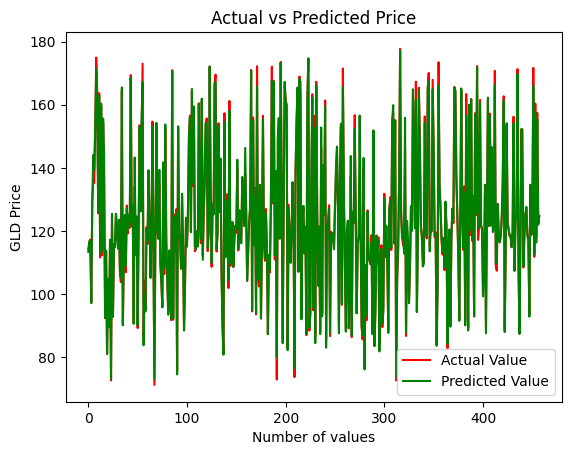

In [20]:
'5 - Random forest'
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error , r2_score

regr = RandomForestRegressor(n_estimators=100)

regr.fit(X_train, y_train)

pred_RF = regr.predict(X_test)

print ('MSE of RF = ', mean_squared_error(y_test, pred_RF))
print ('R2_score RF = ', r2_score(y_test, pred_RF))

plt.plot(y_test, color='red', label = 'Actual Value')
plt.plot(pred_RF, color='green', label='Predicted Value')
plt.title('Actual vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

MSE of RF =  65.45341202772158
R2_score RF =  0.8817663082985273


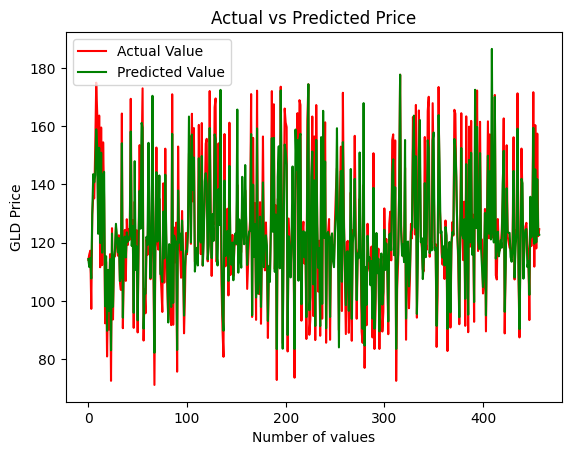

In [21]:
'6 - Lasso regression'
from sklearn.linear_model import  Lasso
from sklearn.metrics import mean_squared_error , r2_score


regr = Lasso(alpha = 10)

regr.fit(X_train, y_train)

pred_lasso = regr.predict(X_test)

print ('MSE of RF = ', mean_squared_error(y_test, pred_lasso))
print ('R2_score RF = ', r2_score(y_test, pred_lasso))

plt.plot(y_test, color='red', label = 'Actual Value')
plt.plot(pred_lasso, color='green', label='Predicted Value')
plt.title('Actual vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

MSE of KNN =  30.1285796185479
R2_score KNN =  0.9455763560116017


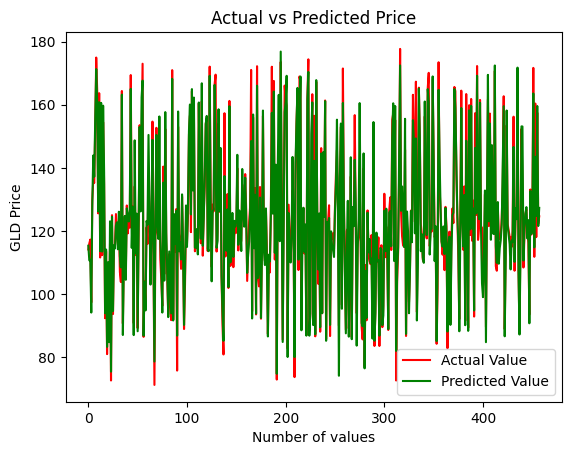

In [23]:
'6 - Lasso regression'
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error , r2_score


regr = KNeighborsRegressor()

regr.fit(X_train, y_train)

pred_knn = regr.predict(X_test)

print ('MSE of KNN = ', mean_squared_error(y_test, pred_knn))
print ('R2_score KNN = ', r2_score(y_test, pred_knn))

plt.plot(y_test, color='red', label = 'Actual Value')
plt.plot(pred_knn, color='green', label='Predicted Value')
plt.title('Actual vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

MSE of KNN =  60.08511784323661
R2_score KNN =  0.8914634840439626


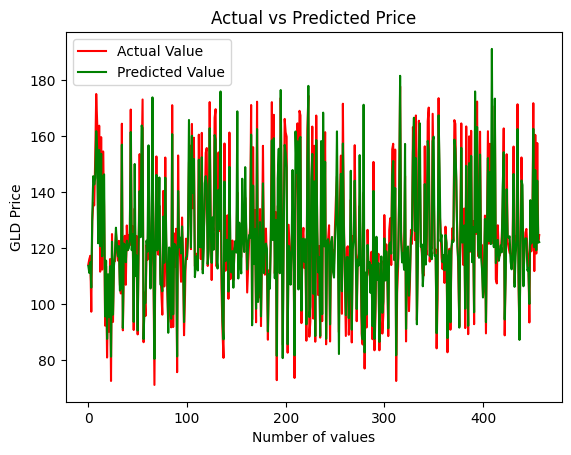

In [26]:
'8 - Ridge'
from sklearn.linear_model import Ridge
regr = Ridge(alpha=1e-15)

regr.fit(X_train, y_train)

pred_ridge = regr.predict(X_test)

print ('MSE of KNN = ', mean_squared_error(y_test, pred_ridge))
print ('R2_score KNN = ', r2_score(y_test, pred_ridge))

plt.plot(y_test, color='red', label = 'Actual Value')
plt.plot(pred_ridge, color='green', label='Predicted Value')
plt.title('Actual vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()